In [144]:
import pandas as pd

dfmy = pd.read_csv(r"C:\Users\admin\Desktop\Git_p\customer-support-classification\data_clean\topic_Baomy_tiki.csv")

In [157]:
dfmy = dfmy[~dfmy["label"].isin(["n","delievr","othe","quaity"])]

In [160]:
dfthang=pd.read_csv(r"C:\Users\admin\Desktop\Git_p\customer-support-classification\data_raw\hthang_noise.csv")
dfduong=pd.read_csv(r"C:\Users\admin\Desktop\Git_p\customer-support-classification\data_clean\pay.csv")
dfhung=pd.read_csv(r"C:\Users\admin\Desktop\Git_p\customer-support-classification\data_raw\Hung_shopee.csv")
dfphu=pd.read_csv(r"C:\Users\admin\Desktop\Git_p\customer-support-classification\data_raw\data_dirty_doi_tra_bao hanh_Phongphu.csv")
dfkhanh=pd.read_csv(r"C:\Users\admin\Desktop\Git_p\customer-support-classification\data_raw\noisy_feedback_promo.csv")
dfthuan=pd.read_csv(r"C:\Users\admin\Desktop\Git_p\customer-support-classification\data_raw\noisy_feedback.csv")

In [161]:
df = pd.concat([dfmy,dfduong,dfthang,dfthuan,dfphu,dfkhanh,dfhung],ignore_index=True)

In [163]:
df["label"]=df["label"].fillna('').astype(str) + " "+df["Category"].fillna('').astype(str)+" "+df["Label"].fillna('').astype(str)
df["label"]=df["label"].str.strip()
df = df.drop(columns=["Label", "Category"])

In [164]:
df["content"]=df["Nội dung"].fillna('').astype(str)+" "+df["Request"].fillna('').astype(str)+" "+df["content"].fillna('').astype(str)
df["content"]=df["content"].str.strip()
df=df.drop(columns=["Nội dung","Request"])

In [165]:
df["rating"]=df["rating"].fillna('').astype(str)+" "+df["Đánh giá"].fillna('').astype(str)
df["rating"]=df["rating"].str.strip()
df=df.drop(columns=["Đánh giá"])
df["created_at"]=df["UserName"].fillna('').astype(str)+" "+df["user_name"].fillna('').astype(str)
df["created_at"]=df["created_at"].str.strip()
df=df.drop(columns=["user_name","UserName","TimeStamp"])

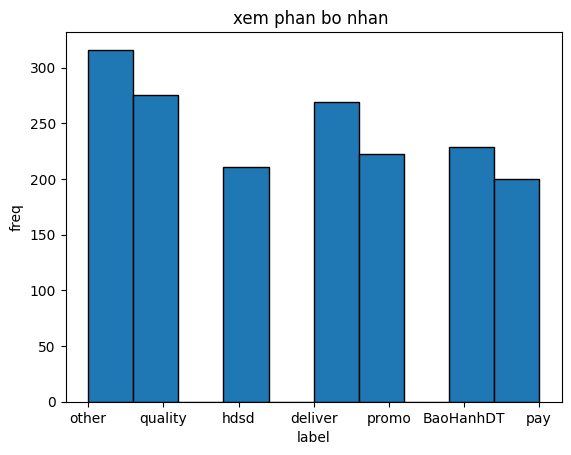

In [173]:
import matplotlib.pyplot as plt 

plt.hist(df["label"], edgecolor = 'black')
plt.xlabel("label")
plt.ylabel("freq")
plt.title("xem phan bo nhan ")
plt.show()

In [175]:
import os
df_sen=pd.DataFrame(df)
output_directory = r'C:\Users\admin\Desktop\Git_p\customer-support-classification\data_clean'
file_path = os.path.join(output_directory, 'cleaned_data.csv')
df_sen.to_csv(file_path, index=False)

-----

In [184]:
df_final=pd.read_csv(r"C:\Users\admin\Desktop\Git_p\customer-support-classification\data_clean\sentiment.csv")

In [186]:
df_final=df_final.drop(columns=["ID","Unnamed: 4","Unnamed: 5","TicketID","Priority","idex"])

In [187]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1722 entries, 0 to 1721
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   content      1722 non-null   object 
 1   rating       1527 non-null   float64
 2   created_at   375 non-null    object 
 3   thank_count  1127 non-null   float64
 4   label        1722 non-null   object 
 5   sentiment    1718 non-null   object 
dtypes: float64(2), object(4)
memory usage: 80.8+ KB


In [189]:
#độ dài trung bình ( kí tự , từ )

df_final["len_ki_tu"] = df_final["content"].astype(str).apply(len)
df_final["len_word"] = df_final["content"].astype(str).apply(lambda x : len(x.split()))

In [191]:
df_final.head()

,content,rating,created_at,thank_count,label,sentiment,len_ki_tu,len_word
0,Mua hàng chiều ngày 06/03/2023. Nhận hàng sáng...,5.0,NaN,5.0,other,p,579,132
1,Hôm qua mình mua 1 bình về vợ thấy thích quá. ...,5.0,NaN,18.0,other,p,338,76
2,"Mua lần thứ 2, giữ lạnh cũng tầm được hơn 12 t...",4.0,NaN,0.0,other,n,251,61
3,Cũng là shop tick xanh uy tín chứ không phải l...,1.0,NaN,3.0,quality,n,502,115
4,Tiki giao hàng nhanh và đóng gói cẩn thận. Về ...,5.0,NaN,1.0,other,p,286,61


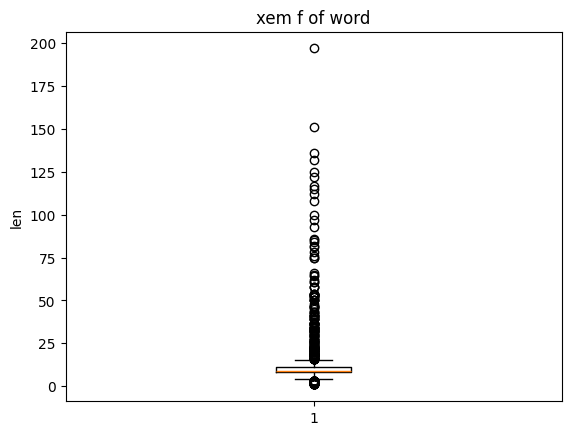

In [192]:
plt.boxplot(df_final["len_word"])
plt.ylabel("len")
plt.title("xem f of word")
plt.show()

In [80]:
from collections import Counter
import re

In [193]:
all_text = " ".join(df_final["content"].dropna().astype(str))
words = re.findall(r'\b\w+\b', all_text.lower())
f_word = Counter(words)

top_w = f_word.most_common(20)

for w,f in top_w:
    print(f"{w}:{f}")

ko:359
mà:232
có:215
không:212
hàng:195
chưa:185
bị:183
fnjskf:172
đẹp:157
rất:152
bình:146
giao:144
hết:143
dụng:130
div:125
i:121
giữ:119
hơi:119
mình:114
b:111


In [194]:
import re

def clean_text(text):
    if pd.isna(text):  #nan
        return ""
    text = text.lower()  #viet thuong
    text = re.sub(r'[^\w\s]', ' ', text)  # bỏ dấu câu, ký tự đặc biệt
    text = re.sub(r'\d+', '', text)       
    text = re.sub(r'\s+', ' ', text).strip() 
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)
    return text

df_final["content"] = df_final["content"].astype(str).apply(clean_text)


In [195]:
from underthesea import word_tokenize

def tokenize_vi(text):
    if pd.isna(text):  
        return []
    return word_tokenize(text, format="text").split()

df_final["content"] = df_final["content"].astype(str).apply(tokenize_vi)



In [197]:
df_final.head()

,content,rating,created_at,thank_count,label,sentiment,len_ki_tu,len_word
0,"[mua, hàng, chiều, ngày, nhận, hàng, sáng, ngà...",5.0,NaN,5.0,other,p,579,132
1,"[hôm_qua, mình, mua, bình, về, vợ, thấy, thích...",5.0,NaN,18.0,other,p,338,76
2,"[mua, lần, thứ, giữ, lạnh, cũng, tầm, được, hơ...",4.0,NaN,0.0,other,n,251,61
3,"[cũng, là, shop, tick, xanh, uy_tín, chứ, khôn...",1.0,NaN,3.0,quality,n,502,115
4,"[tiki, giao, hàng, nhanh, và, đóng_gói, cẩn_th...",5.0,NaN,1.0,other,p,286,61


In [199]:
dictpath = r"C:\Users\admin\Desktop\Git_p\customer-support-classification\Viet74K.txt"
with open(dictpath, "r", encoding="utf-8") as f:
    vocab = set(f.read().splitlines())

def remove_non_vocab(tokens):
    return [t for t in tokens if t in vocab]

df_final["tokens_vi"] = df_final["content"].apply(remove_non_vocab)

In [201]:
# Đọc file stopwords từ path
stopword_path = r"C:\Users\admin\Desktop\Git_p\customer-support-classification\vietnamese-stopwords.txt"

with open(stopword_path, "r", encoding="utf-8") as f:
    stop_words_vi = set(f.read().splitlines())

# Hàm loại bỏ stopwords
def remove_stopwords_vi(tokens):
    return [w for w in tokens if w not in stop_words_vi]

df_final["tokens_vi_nostop"] = df_final["tokens_vi"].apply(remove_stopwords_vi)



In [202]:

dict = {
    "k": "không",
    "ko": "không",
    "dc": "được",
    "hok": "không",
    "tks": "cảm ơn",
    "thanks": "cảm ơn",
    "ok": "đồng ý"
}

def viet_tat(tokens):
    return [dict.get(w, w) for w in tokens]

# Áp dụng vào cột tokens_vi_nostop
df_final["chuan"] = df_final["tokens_vi_nostop"].apply(viet_tat)


In [204]:
df_final['rating'] = df_final['rating'].fillna(df_final['rating'].mean())
df_final['thank_count'] = df_final['thank_count'].fillna(df_final['thank_count'].mean())


In [207]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1718 entries, 0 to 1721
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   content           1718 non-null   object 
 1   rating            1718 non-null   float64
 2   created_at        375 non-null    object 
 3   thank_count       1718 non-null   float64
 4   label             1718 non-null   object 
 5   sentiment         1718 non-null   object 
 6   len_ki_tu         1718 non-null   int64  
 7   len_word          1718 non-null   int64  
 8   tokens_vi         1718 non-null   object 
 9   tokens_vi_nostop  1718 non-null   object 
 10  chuan             1718 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 161.1+ KB


In [206]:
df_final.dropna(subset=['sentiment'], inplace=True)

In [217]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_topic_train, y_topic_test, y_sentiment_train, y_sentiment_test = train_test_split(
    df_final['chuan'], df_final['label'], df_final['sentiment'], test_size=0.2, random_state=42,stratify=df_final[['sentiment', 'label']]
)

In [225]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=1, max_df=0.9, ngram_range=(1, 2))
X_train_str = X_train.apply(lambda tokens: " ".join(tokens))
X_train_tfidf = vectorizer.fit_transform(X_train_str)
X_test_str = X_test.apply(lambda tokens: " ".join(tokens))
X_test_tfidf = vectorizer.transform(X_test_str)

In [226]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


print("--- Huấn luyện mô hình Cảm xúc ---")
sentiment_model = LogisticRegression(max_iter=1000, random_state=42)
sentiment_model.fit(X_train_tfidf, y_sentiment_train)
y_sentiment_pred = sentiment_model.predict(X_test_tfidf)
print(f"Độ chính xác (Accuracy) phân loại cảm xúc: {accuracy_score(y_sentiment_test, y_sentiment_pred):.2f}")
print("\nBáo cáo phân loại cảm xúc:\n", classification_report(y_sentiment_test, y_sentiment_pred, zero_division=0))
print("\n" + "="*50 + "\n")

--- Huấn luyện mô hình Cảm xúc ---
Độ chính xác (Accuracy) phân loại cảm xúc: 0.84

Báo cáo phân loại cảm xúc:
               precision    recall  f1-score   support

           n       0.83      0.94      0.89       230
           p       0.85      0.62      0.72       114

    accuracy                           0.84       344
   macro avg       0.84      0.78      0.80       344
weighted avg       0.84      0.84      0.83       344





In [227]:
print("--- Huấn luyện mô hình Chủ đề ---")
topic_model = LogisticRegression(max_iter=1000, random_state=42)
topic_model.fit(X_train_tfidf, y_topic_train)
y_topic_pred = topic_model.predict(X_test_tfidf)
print(f"Độ chính xác (Accuracy) phân loại chủ đề: {accuracy_score(y_topic_test, y_topic_pred):.2f}")
print("\nBáo cáo phân loại chủ đề:\n", classification_report(y_topic_test, y_topic_pred, zero_division=0))
print("\n" + "="*50 + "\n")

--- Huấn luyện mô hình Chủ đề ---
Độ chính xác (Accuracy) phân loại chủ đề: 0.78

Báo cáo phân loại chủ đề:
               precision    recall  f1-score   support

   BaoHanhDT       0.96      0.50      0.66        46
     deliver       0.90      0.87      0.89        54
        hdsd       0.51      0.88      0.65        42
       other       0.76      0.79      0.78        63
         pay       0.84      0.80      0.82        40
       promo       0.84      0.82      0.83        44
     quality       0.88      0.78      0.83        55

    accuracy                           0.78       344
   macro avg       0.81      0.78      0.78       344
weighted avg       0.82      0.78      0.78       344





In [228]:
import joblib
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
print("Đã lưu TfidfVectorizer vào tfidf_vectorizer.pkl")

# Lưu mô hình cảm xúc
joblib.dump(sentiment_model, 'sentiment_model.pkl')
print("Đã lưu mô hình cảm xúc vào sentiment_model.pkl")

# Lưu mô hình chủ đề
joblib.dump(topic_model, 'topic_model.pkl')
print("Đã lưu mô hình chủ đề vào topic_model.pkl")

print("\n--- Quy trình huấn luyện và lưu mô hình hoàn tất ---")

Đã lưu TfidfVectorizer vào tfidf_vectorizer.pkl
Đã lưu mô hình cảm xúc vào sentiment_model.pkl
Đã lưu mô hình chủ đề vào topic_model.pkl

--- Quy trình huấn luyện và lưu mô hình hoàn tất ---


In [229]:
# Kiểm tra các nhãn trong y_sentiment_train và y_topic_train
print(sentiment_model.classes_)  # xem các nhãn sentiment
print(topic_model.classes_)      # xem các nhãn topic


['n' 'p']
['BaoHanhDT' 'deliver' 'hdsd' 'other' 'pay' 'promo' 'quality']


In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(random_state=42, C=1.0, solver='liblinear', max_iter=1000)
log_reg_model.fit(X_train, y_train)

c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [230]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("\n--- Đánh giá Mô hình Logistic Regression ---")
y_pred_log_reg = log_reg_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_log_reg)
print(f"Độ chính xác (Accuracy): {accuracy:.4f}")



--- Đánh giá Mô hình Logistic Regression ---


ValueError: setting an array element with a sequence.

In [142]:
print(classification_report(y_test, y_pred_log_reg))


              precision    recall  f1-score   support

   BaoHanhDT       0.90      1.00      0.95        38
    delivery       0.77      0.86      0.81        58
        hdsd       0.84      0.93      0.88        40
         neg       0.76      0.94      0.84        47
       other       0.00      0.00      0.00         7
     payment       0.88      0.87      0.87        60
         pos       0.60      0.65      0.62        23
   promotion       0.94      0.82      0.88        40
     quality       0.95      0.53      0.68        34

    accuracy                           0.83       347
   macro avg       0.74      0.73      0.73       347
weighted avg       0.82      0.83      0.82       347



c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

In [143]:
print(confusion_matrix(y_test, y_pred_log_reg))


[[38  0  0  0  0  0  0  0  0]
 [ 1 50  0  1  0  0  5  0  1]
 [ 3  0 37  0  0  0  0  0  0]
 [ 0  3  0 44  0  0  0  0  0]
 [ 0  3  0  1  0  0  3  0  0]
 [ 0  0  2  3  0 52  1  2  0]
 [ 0  7  0  0  0  1 15  0  0]
 [ 0  2  0  0  0  4  1 33  0]
 [ 0  0  5  9  0  2  0  0 18]]
